# Your first Machine Learning Project in Python - Step by Step
based on https://machinelearningmastery.com/machine-learning-in-r-step-by-step/ and LEARN Classes  
by João Almeida <joaofilipe90@gmail.com>




### Data
Get data set from UCI repository - Breast Cancer Coimbra  
available from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra



In [6]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [7]:
%%bash 
#wget https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv

In [8]:
# Read csv file containing training datadata
dataset = pd.read_csv("dataR2.csv")
# Define Classification as human readable (and string)
dataset["Classification"]=dataset["Classification"].apply(lambda x: "patient" if x==1 else "control")
# Print first 5 rows
print(f'There are {dataset.shape[0]} rows and {dataset.shape[1]} columns in this data frame')
dataset.head()

There are 116 rows and 10 columns in this data frame


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,patient
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,patient
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,patient
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,patient
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,patient


In [9]:
train,test = train_test_split(dataset, test_size=0.2, random_state=42,stratify=dataset["Classification"])

display(train["Classification"].value_counts())
display(test["Classification"].value_counts())

control    51
patient    41
Name: Classification, dtype: int64

control    13
patient    11
Name: Classification, dtype: int64

In [10]:
display(test.info())
test.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 66 to 105
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             24 non-null     int64  
 1   BMI             24 non-null     float64
 2   Glucose         24 non-null     int64  
 3   Insulin         24 non-null     float64
 4   HOMA            24 non-null     float64
 5   Leptin          24 non-null     float64
 6   Adiponectin     24 non-null     float64
 7   Resistin        24 non-null     float64
 8   MCP.1           24 non-null     float64
 9   Classification  24 non-null     object 
dtypes: float64(7), int64(2), object(1)
memory usage: 2.1+ KB


None

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,control
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
mean,59.291667,25.787801,94.750000,9.950542,2.599611,23.251954,10.429367,10.514564,508.226333,NaN
std,15.386270,4.997267,19.004004,11.115136,3.343155,20.299783,9.266403,6.884566,242.781510,NaN
min,24.000000,18.370000,76.000000,2.640000,0.507936,6.333900,2.194280,3.210000,90.090000,NaN
25%,48.500000,21.864380,82.000000,3.386500,0.730955,9.435000,3.849914,5.384213,292.004500,NaN
50%,59.500000,26.131250,91.000000,5.727500,1.231965,18.557000,7.888803,9.366600,522.035000,NaN
75%,72.250000,28.788549,95.750000,10.653500,2.338620,27.865700,12.989937,13.266915,654.689000,NaN


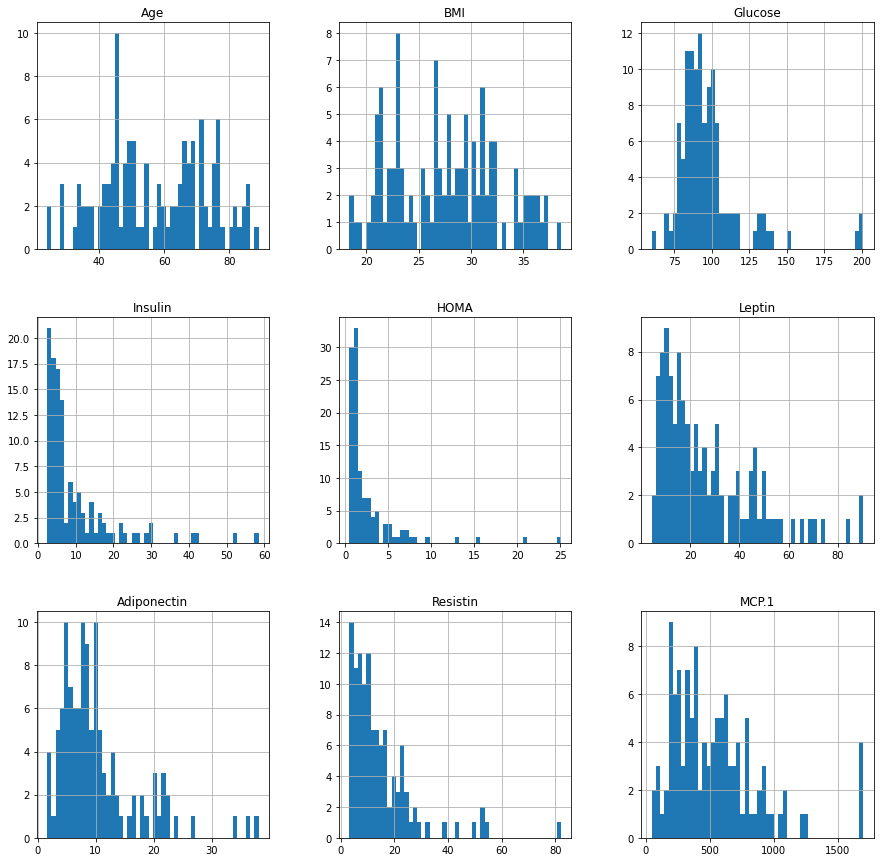

In [11]:
%matplotlib inline 
dataset.hist(bins=50, figsize=(15,15))
plt.show()

In [12]:
#boxplot

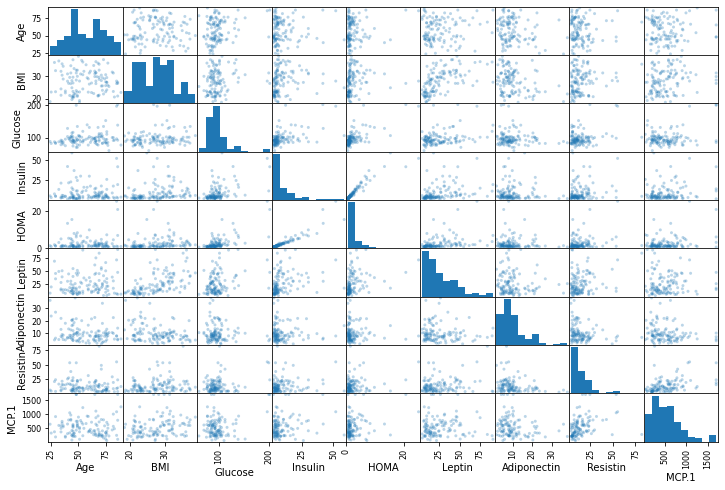

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize=(12, 8),alpha=0.3);

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score,KFold

cv = KFold(n_splits=10, random_state=7,shuffle=True)
scoring="accuracy"
results={}
X_train=train.iloc[:,1:-1]
y_train=train.iloc[:,-1]

In [15]:
# A) Linear algorithms
# Linear Discriminant Analysis
lda_model=LinearDiscriminantAnalysis()
lda_scores = cross_val_score(lda_model, X_train,y_train , cv=cv,scoring=scoring)
results["lda"]=lda_scores

In [16]:
# B) Non-Linear algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# CART
model_cart = DecisionTreeClassifier(random_state=42)
cart_scores = cross_val_score(model_cart, X_train, y_train, cv=cv,scoring=scoring)
results["cart"]=cart_scores

# kNN
model_knn = KNeighborsClassifier()
knn_scores = cross_val_score(model_knn,  X_train, y_train, cv=cv,scoring=scoring)
results["knn"]=knn_scores

In [17]:
# C) Advanced algorithms
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# SVM
model_svm = SVC(random_state=42)
svm_scores = cross_val_score(model_svm, X_train, y_train, cv=cv,scoring=scoring)
results["svm"]=svm_scores
# Random Forest
model_rf = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(model_rf, X_train,  y_train, cv=cv,scoring=scoring)
results["rf"]=rf_scores
results=pd.DataFrame.from_dict(results)

In [18]:
results.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
lda,10.0,0.707778,0.123289,0.444444,0.666667,0.738889,0.777778,0.888889
cart,10.0,0.593333,0.214444,0.222222,0.444444,0.666667,0.777778,0.800000
knn,10.0,0.425556,0.146102,0.111111,0.350000,0.444444,0.555556,0.555556
svm,10.0,0.511111,0.163635,0.222222,0.411111,0.555556,0.588889,0.777778
rf,10.0,0.661111,0.145838,0.444444,0.555556,0.627778,0.777778,0.888889


In [19]:
results.columns

Index(['lda', 'cart', 'knn', 'svm', 'rf'], dtype='object')

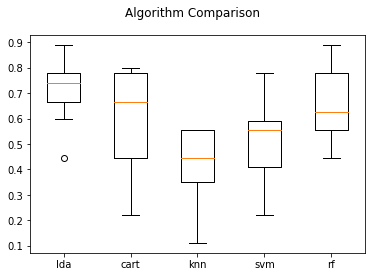

In [20]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xticks([1, 2, 3, 4, 5], results.columns)
plt.show();

In [21]:
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,classification_report,accuracy_score

X_test=test.iloc[:,1:-1]
Y_test=test.iloc[:,-1]

models=[model_rf,model_knn,lda_model,model_svm,model_cart]
models_fit=[model.fit(X_train, y_train) for model in models]
models_acc=[accuracy_score(model.predict(X_test),Y_test) for model in models_fit]

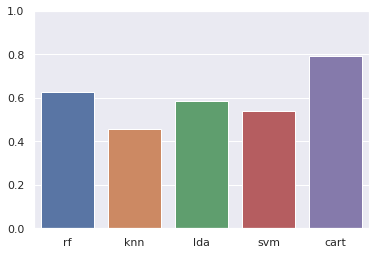

In [22]:
sns.set_theme()

ax=sns.barplot(x=["rf","knn","lda","svm","cart"],y=models_acc);

ax.set(ylim=(0, 1));


In [23]:
models_acc

[0.625,
 0.4583333333333333,
 0.5833333333333334,
 0.5416666666666666,
 0.7916666666666666]

In [53]:
from sklearn.metrics import roc_curve,auc
test = models_fit[0].predict_proba(X_test)
only_pos=[result[1] for result in test]##to create only percentage for the positive

In [59]:
fpr, tpr, thresholds =roc_curve(Y_test.values,only_pos,pos_label="patient")
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.681818


In [63]:
####################################
# The optimal cut off would be where tpr is high and fpr is low
# tpr - (1-fpr) is zero or near to zero is the optimal cut off point
####################################
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
9,0.384615,0.636364,0.615385,0.020979,0.5


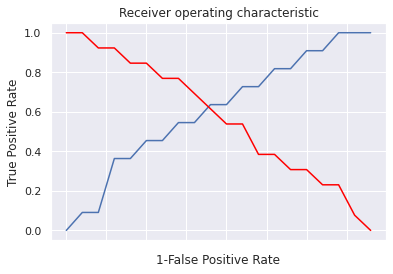

In [65]:
# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['tpr']);
plt.plot(roc['1-fpr'], color = 'red');
plt.xlabel('1-False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('Receiver operating characteristic');
ax.set_xticklabels([]);